<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/43_data_science_libs/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Применение корреляционного анализа

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/5997359/attachment/09a326d605d519d161851ee495c93841.csv')

In [3]:
data.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

In [12]:
correlation_1 = data['Score'].corr(data['GDP per capita'], method='pearson')
print(correlation_1)

0.7938828678781275


Наблюдаем достаточно высокую, линейную и монотонную корреляцию.<br>
Которая опровергает тезис "Не в деньгах счастье" по крайней мере для больших групп людей

<Axes: xlabel='GDP per capita', ylabel='Score'>

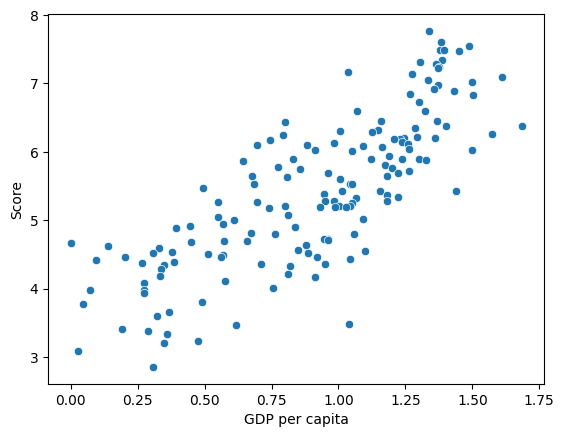

In [13]:
sns.scatterplot(x=data['GDP per capita'], y=data['Score'])

Задание 2: Исследование влияния социальной поддержки на оценку счастья.<br>
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

In [16]:
correlation_2 = data['Score'].corr(data['Social support'], method='spearman')
print(correlation_2)

0.8161807357057258


<Axes: xlabel='Social support', ylabel='Score'>

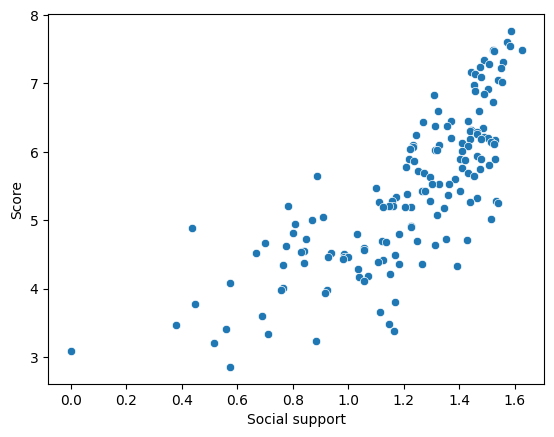

In [17]:
sns.scatterplot(x=data['Social support'], y=data['Score'])

Корреляция высокая, менее нелинейна, но все еще монотонна. <br>
Похоже, мы имеем дело с выбросом в данных -
из-за нескольких несчастных одиночек, участвующих в исследовании<br>
Пронаблюдаем выброс


<Axes: ylabel='Social support'>

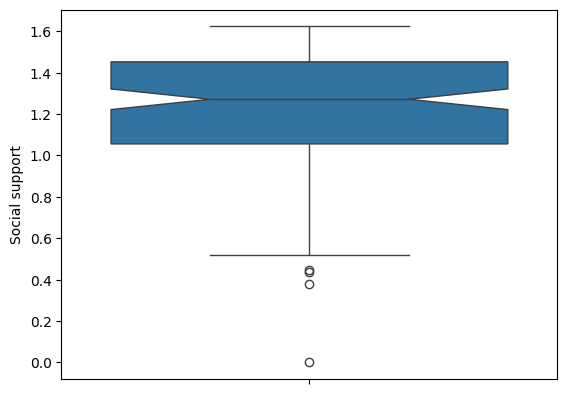

In [18]:
sns.boxplot(data=data['Social support'], notch=True)

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

In [19]:
correlation_3 = data['Score'].corr(data['Healthy life expectancy'], method='kendall')
print(correlation_3)

0.6026128531700046


<Axes: xlabel='Healthy life expectancy', ylabel='Score'>

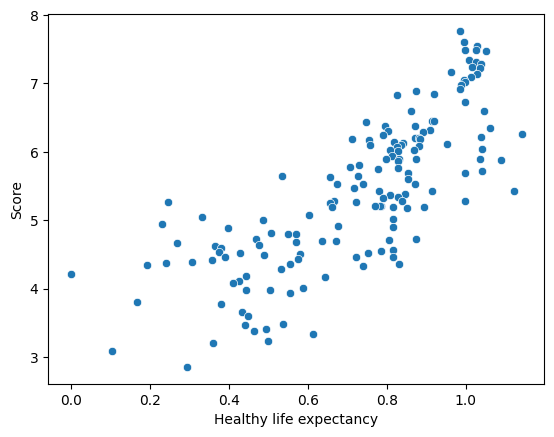

In [20]:
sns.scatterplot(x=data['Healthy life expectancy'], y=data['Score'])

Наблюдаем корреляцию - не очень ярко выраженную, нелинейную и монотонную <br>
Похоже, что люди с большой ожидаемой продолжительностью здоровой жизни <br>
чувствуют себя счастливее, что понятно. <br>
Но, возмножно, здесь перепутаны причина и следствие: более счастливые живут дольше и сохраняют здоровье.

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [23]:
correlation_4 = data['Score'].corr(data['Freedom to make life choices'], method='pearson')
print(correlation_4)

0.5667418257199898


<Axes: xlabel='Freedom to make life choices', ylabel='Score'>

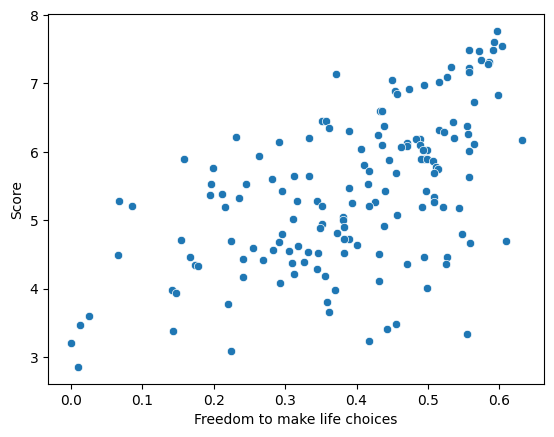

In [22]:
sns.scatterplot(x=data['Freedom to make life choices'], y=data['Score'])

Наблюдаем очень слабую корреляцию. Получается, свобода для счастья ненужна.

Посмотрим на общую картину

<Axes: >

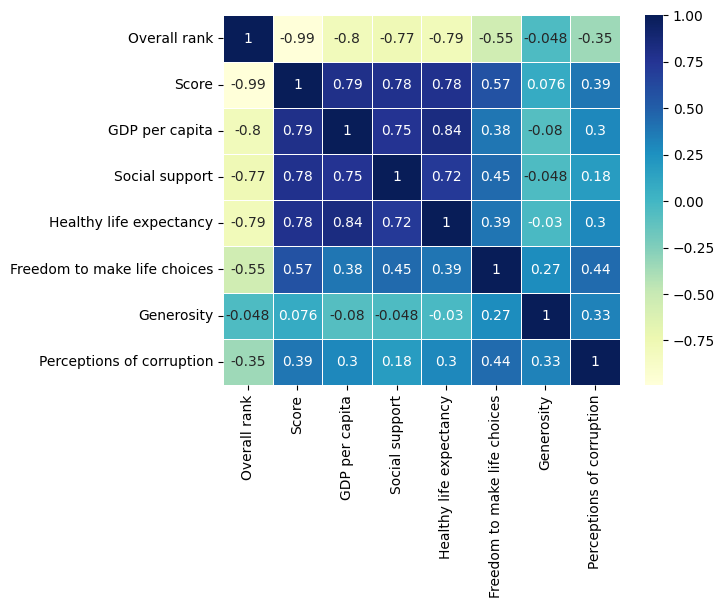

In [25]:
df_corr = data.drop(columns=['Country or region']).corr(method='pearson')
sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            annot=True,
            linewidths=0.5,
            cmap="YlGnBu")

Похоже, самым влиятельным фактором является GDP - чтобы чувствовать себя счастливее, нужно разбогатеть.